In [ ]:
import sys

import matplotlib.pyplot as plt 
sys.path.append('../resonator_abstraction.py')
from meep_resonator import *

Using MPI version 4.1, 1 processes


In [2]:
linear = LinearWaveguides("main_conf.json")
linear.run_simulation(save_ez=True)

Simulation Progress: 100%|██████████| 2000/2000 [00:55<00:00, 36.09it/s]


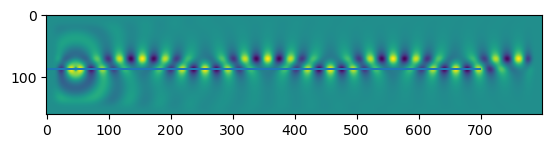

In [14]:
plt.imshow(linear.ez_field)
plt.hlines(87, 0,700)

800


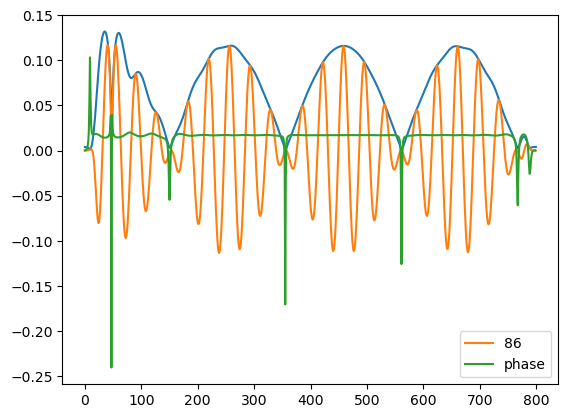

In [39]:
from scipy.signal import hilbert, chirp

signal = linear.ez_field[86]

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase_diff = np.diff(np.unwrap(np.angle(analytic_signal)))
print(len(amplitude_envelope))
plt.plot(amplitude_envelope)
plt.plot(linear.ez_field[86], label=slice)

mins = [comp for comp in analytic_signal if comp==0]
y_min = np.zeros(len(mins))
plt.plot(instantaneous_phase_diff/10, label="phase")
plt.legend()
plt.show()